In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from pandas import DataFrame
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [4]:
basket = pd.read_excel("content/datamba.xls", header = None)
basket.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
basket.shape

(7501, 20)

In [4]:
#Checking the data type
print(basket.dtypes)

0     object
1     object
2     object
3     object
4     object
5     object
6     object
7     object
8     object
9     object
10    object
11    object
12    object
13    object
14    object
15    object
16    object
17    object
18    object
19    object
dtype: object


In [6]:
#Converting the data frame into a list of lists
records = []
for i in range (0, 7501):
    records.append([str(basket.values[i,j]) for j in range(0, 20)])

In [7]:
type(records)

list

In [9]:
list(records)

[['shrimp',
  'almonds',
  'avocado',
  'vegetables mix',
  'green grapes',
  'whole weat flour',
  'yams',
  'cottage cheese',
  'energy drink',
  'tomato juice',
  'low fat yogurt',
  'green tea',
  'honey',
  'salad',
  'mineral water',
  'salmon',
  'antioxydant juice',
  'frozen smoothie',
  'spinach',
  'olive oil'],
 ['burgers',
  'meatballs',
  'eggs',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan'],
 ['chutney',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan'],
 ['turkey',
  'avocado',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan',
  'nan'],
 ['mineral water',
  'milk',
  'energy bar',
  'whole wheat rice',
  'green tea',
  'nan',
  'nan',
  'nan',
 

In [11]:
TE = TransactionEncoder()
array = TE.fit(records).transform(records)

transf_df = pd.DataFrame(array, columns = TE.columns_)
transf_df

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,True,True,False,True,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7497,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7498,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7499,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [12]:
#check column names
for col in transf_df.columns:
    print(col)

 asparagus
almonds
antioxydant juice
asparagus
avocado
babies food
bacon
barbecue sauce
black tea
blueberries
body spray
bramble
brownies
bug spray
burger sauce
burgers
butter
cake
candy bars
carrots
cauliflower
cereals
champagne
chicken
chili
chocolate
chocolate bread
chutney
cider
clothes accessories
cookies
cooking oil
corn
cottage cheese
cream
dessert wine
eggplant
eggs
energy bar
energy drink
escalope
extra dark chocolate
flax seed
french fries
french wine
fresh bread
fresh tuna
fromage blanc
frozen smoothie
frozen vegetables
gluten free bar
grated cheese
green beans
green grapes
green tea
ground beef
gums
ham
hand protein bar
herb & pepper
honey
hot dogs
ketchup
light cream
light mayo
low fat yogurt
magazines
mashed potato
mayonnaise
meatballs
melons
milk
mineral water
mint
mint green tea
muffins
mushroom cream sauce
nan
napkins
nonfat milk
oatmeal
oil
olive oil
pancakes
parmesan cheese
pasta
pepper
pet food
pickles
protein bar
red wine
rice
salad
salmon
salt
sandwich
shallot
sha

In [13]:
#drop nan column
basket_clean = transf_df.drop(['nan'], axis = 1)
basket_clean

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,True,True,False,True,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7497,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7498,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7499,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [14]:
count = basket_clean.loc[:,:].sum()
count

 asparagus             1
almonds              153
antioxydant juice     67
asparagus             35
avocado              250
                    ... 
whole wheat pasta    221
whole wheat rice     439
yams                  86
yogurt cake          205
zucchini              71
Length: 120, dtype: int64

In [15]:
pop_item = count.sort_values(0, ascending = False).head(10)
pop_item

mineral water        1788
eggs                 1348
spaghetti            1306
french fries         1282
chocolate            1229
green tea             991
milk                  972
ground beef           737
frozen vegetables     715
pancakes              713
dtype: int64

In [17]:
pop_item = pop_item.to_frame()
pop_item = pop_item.reset_index()
pop_item = pop_item.rename(columns = {"index": "items",0: "count"})
pop_item

,items,count
0,mineral water,1788
1,eggs,1348
2,spaghetti,1306
3,french fries,1282
4,chocolate,1229
5,green tea,991
6,milk,972
7,ground beef,737
8,frozen vegetables,715
9,pancakes,713


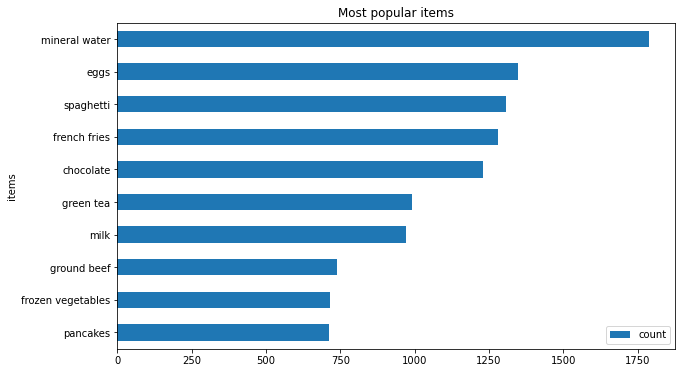

In [20]:
#Data Visualization

plt.rcParams['figure.figsize'] = (10, 6)

ax = pop_item.plot.barh(x = 'items', y = 'count')
plt.title('Most popular items')
plt.gca().invert_yaxis()

In [23]:
a_rules = apriori(basket_clean, min_support = 0.04, use_colnames =
True)
a_rules

,support,itemsets
0,0.087188,(burgers)
1,0.081056,(cake)
2,0.046794,(champagne)
3,0.059992,(chicken)
4,0.163845,(chocolate)
5,0.080389,(cookies)
6,0.051060,(cooking oil)
7,0.179709,(eggs)
8,0.079323,(escalope)
9,0.170911,(french fries)


In [27]:
rules = association_rules(a_rules, metric = 'lift', min_threshold =1)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(mineral water),(chocolate),0.238368,0.163845,0.052660,0.220917,1.348332,0.013604,1.073256
1,(chocolate),(mineral water),0.163845,0.238368,0.052660,0.321400,1.348332,0.013604,1.122357
2,(mineral water),(eggs),0.238368,0.179709,0.050927,0.213647,1.188845,0.008090,1.043158
3,(eggs),(mineral water),0.179709,0.238368,0.050927,0.283383,1.188845,0.008090,1.062815
4,(mineral water),(ground beef),0.238368,0.098254,0.040928,0.171700,1.747522,0.017507,1.088672
5,(ground beef),(mineral water),0.098254,0.238368,0.040928,0.416554,1.747522,0.017507,1.305401
6,(mineral water),(milk),0.238368,0.129583,0.047994,0.201342,1.553774,0.017105,1.089850
7,(milk),(mineral water),0.129583,0.238368,0.047994,0.370370,1.553774,0.017105,1.209650
8,(mineral water),(spaghetti),0.238368,0.174110,0.059725,0.250559,1.439085,0.018223,1.102008
9,(spaghetti),(mineral water),0.174110,0.238368,0.059725,0.343032,1.439085,0.018223,1.159314
